### Importing libraries 📚

In [242]:
# Importing the pandas library 
import pandas as pd

# Importing the chain function from itertools module
from itertools import chain

# Importing the date parsing function from dateutil module
from dateutil import parser

# The 'isodate' package is used for parsing and formatting ISO 8601 dates and durations in Python.
import isodate  

# Importing the pyplot module from matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Importing the ticker module from matplotlib for configuring tick locators and formatters
import matplotlib.ticker as ticker

# Importing the seaborn module for creating statistical graphics
import seaborn as sns

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/daaecd78-24df-461d-9250-
[nltk_data]     e7fbb64e695b/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/daaecd78-24df-461d-9250-
[nltk_data]     e7fbb64e695b/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Load data 💾
Load data which was saved previously in 'data_collection_and_preprocessing' notebook.

In [6]:
#Imports csv files 
video_df = pd.read_csv('video_data.csv')

comments_df = pd.read_csv('comments_data.csv')

channel_df = pd.read_csv('channel_data.csv')

### Data Visualization 📊
Let's see how our data looks like.

In [8]:
video_df.describe().round()

,viewCount,likeCount,commentCount,titleLength,durationSecs
count,3031.0,3031.0,3031.0,3031.0,3031.0
mean,91759.0,2797.0,139.0,49.0,1218.0
std,251717.0,8276.0,324.0,18.0,2073.0
min,68.0,8.0,0.0,4.0,3.0
25%,6766.0,255.0,18.0,36.0,423.0
50%,17672.0,611.0,46.0,46.0,724.0
75%,64724.0,1979.0,122.0,60.0,1194.0
max,3599296.0,184997.0,5610.0,100.0,43494.0


#### Setup

In [54]:
sns.color_palette('flare')

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

In [94]:
# Setting the style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# Color selection for charts
violet = sns.color_palette('flare')[5]
peach = sns.color_palette('flare')[2]

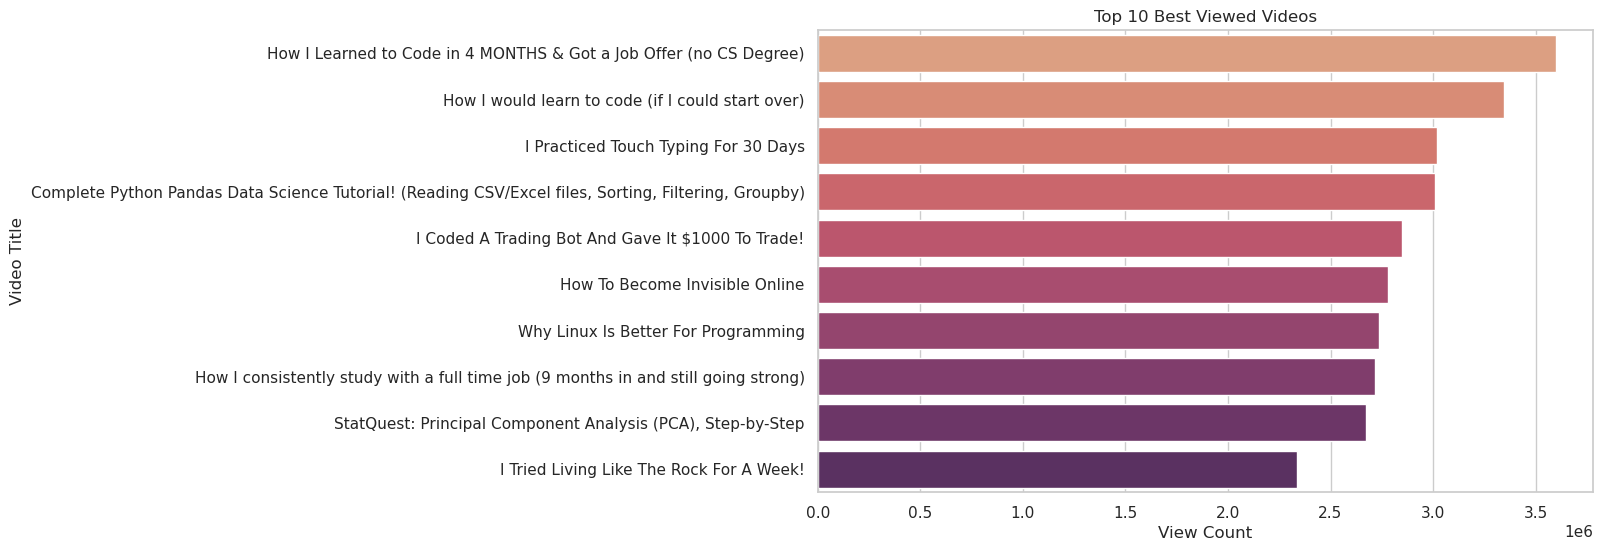

In [96]:
top_10_videos = video_df.nlargest(10, 'viewCount')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='viewCount', y='title', data=top_10_videos, orient='h', palette='flare')
plt.title('Top 10 Best Viewed Videos')
plt.xlabel('View Count')
plt.ylabel('Video Title')
plt.show()

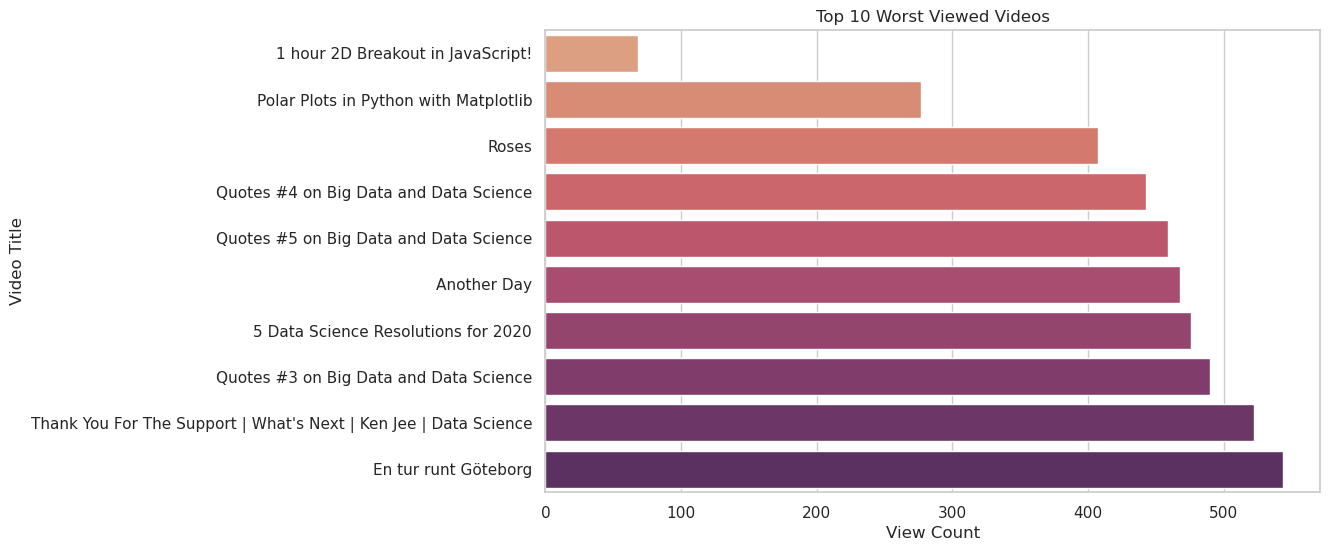

In [59]:
# Select the worst 5 videos based on view count
worst_10_videos = video_df.nsmallest(10, 'viewCount')

# Create the bar plot for the worst 5 videos using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='viewCount', y='title', data=worst_10_videos, orient='h', palette='flare')
plt.title('Top 10 Worst Viewed Videos')
plt.xlabel('View Count')
plt.ylabel('Video Title')
plt.show()

In [209]:
rounded_data = video_df[['viewCount','likeCount','commentCount']].round({'viewCount': -2, 'likeCount': -2, 'commentCount': -1})

rounded_data.describe(percentiles=[.8, .9, .95]).round()

,viewCount,likeCount,commentCount
count,3031.0,3031.0,3031.0
mean,91759.0,2798.0,138.0
std,251717.0,8276.0,324.0
min,100.0,0.0,0.0
50%,17700.0,600.0,50.0
80%,92900.0,2900.0,160.0
90%,216000.0,6200.0,320.0
95%,406600.0,11700.0,565.0
max,3599300.0,185000.0,5610.0


In [211]:
rounded_data = rounded_data.loc[(rounded_data['viewCount'] <= 92900.0) & (rounded_data['likeCount'] <= 12000.0) & (rounded_data['commentCount'] <= 600)]

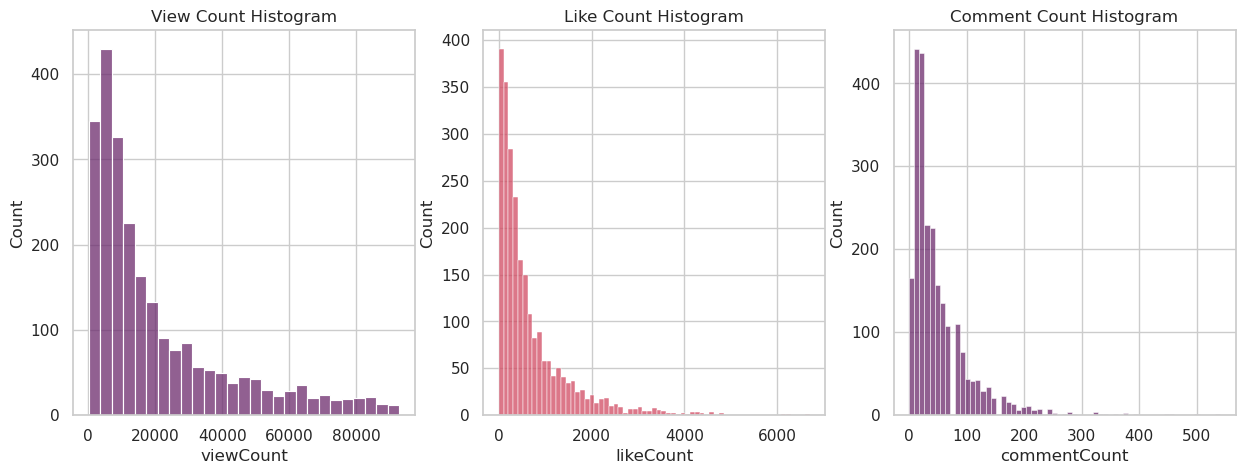

In [215]:
# Create a figure and axis for the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histogram for viewCount
sns.histplot(rounded_data['viewCount'], kde=False, ax=axes[0], color = violet)
axes[0].set_title('View Count Histogram')

# Histogram for likeCount
sns.histplot(rounded_data['likeCount'],kde=False, ax=axes[1], color = peach)
axes[1].set_title('Like Count Histogram')

# Histogram for commentCount
sns.histplot(rounded_data['commentCount'], kde=False, ax=axes[2], color = violet)
axes[2].set_title('Comment Count Histogram')

# Display the histograms
plt.show()

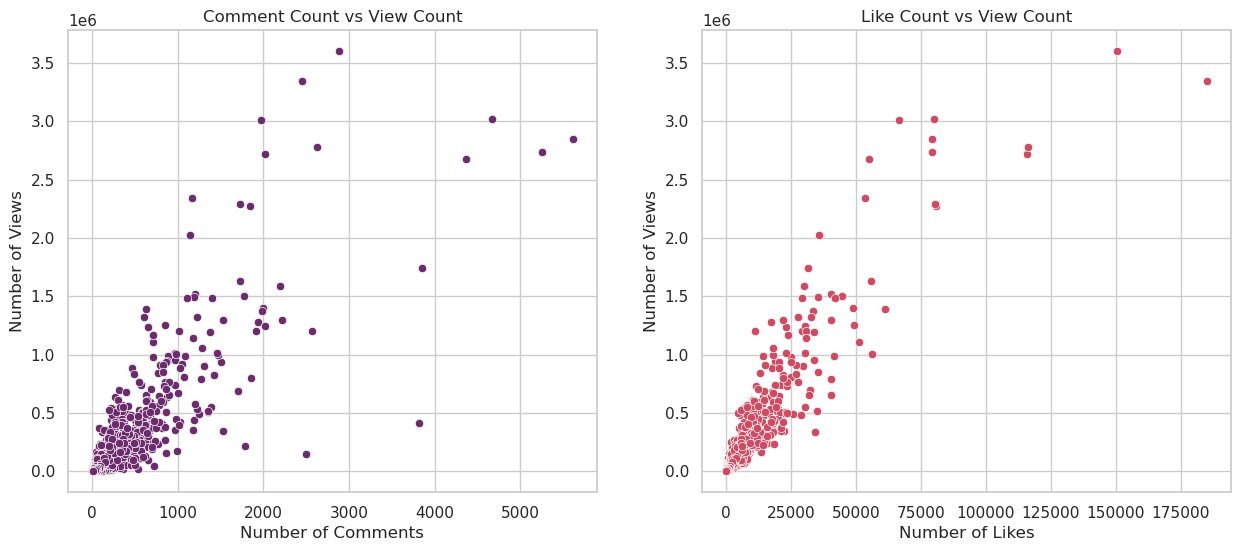

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(data=video_df, x='commentCount', y='viewCount', ax=ax[0], color = violet)
sns.scatterplot(data=video_df, x='likeCount', y='viewCount', ax=ax[1], color = peach)

# Adding titles to the subplots
ax[0].set_title('Comment Count vs View Count')
ax[1].set_title('Like Count vs View Count')

# Adding x and y labels
ax[0].set_xlabel('Number of Comments')
ax[0].set_ylabel('Number of Views')
ax[1].set_xlabel('Number of Likes')
ax[1].set_ylabel('Number of Views')

plt.show()

In [101]:
# Calculate the duration in minutes by dividing the duration in seconds by 60
video_df['durationMinutes'] = video_df['durationSecs'] / 60

# Create a new DataFrame 'dur_df' containing rows where the duration is less than 100 minutes
dur_df = video_df.loc[video_df['durationMinutes'] <= 100]

The DataFrame 'dur_df' serves to eliminate outliers, thereby facilitating data visualization. The provided code segment computes the duration of videos in minutes by dividing the given duration in seconds by 60. Subsequently, it generates a new DataFrame named 'dur_df', comprising rows where the video duration is less than or equal to 100 minutes.



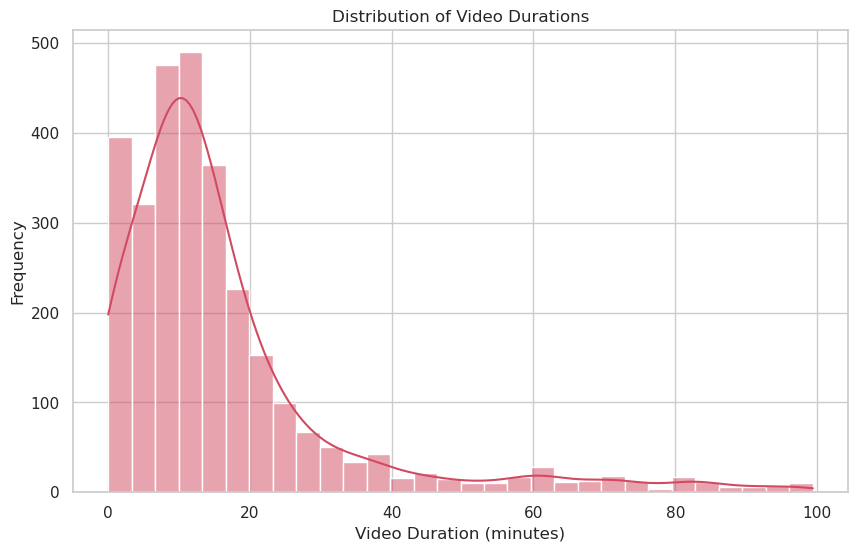

In [125]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data = dur_df, x = dur_df['durationMinutes'], bins=30, kde=True, color = peach)
plt.title('Distribution of Video Durations')
plt.xlabel('Video Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


In [104]:
# dataset with mean total views over time
mean_views = video_df.groupby

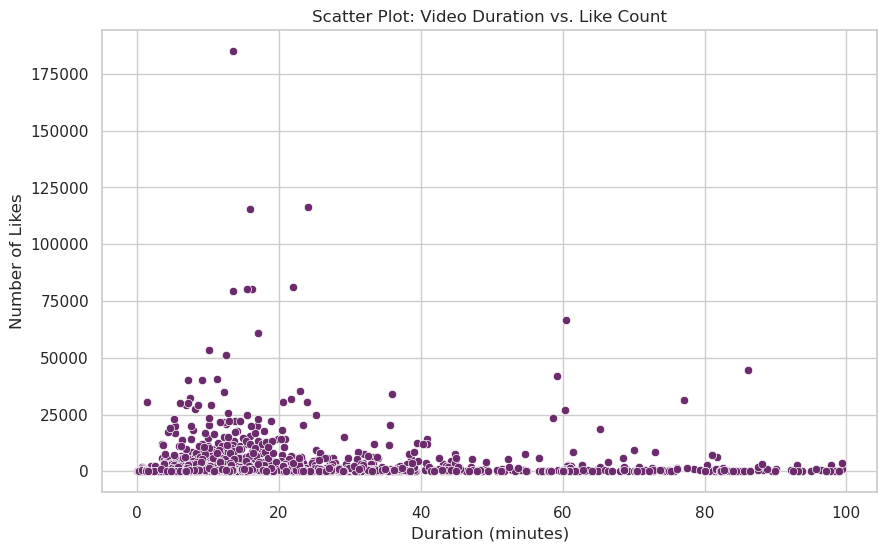

In [129]:
dur_df_without_duplicates = dur_df.drop_duplicates(subset='durationMinutes')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dur_df_without_duplicates, x="durationMinutes", y="likeCount", color = violet)
plt.title('Scatter Plot: Video Duration vs. Like Count')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Likes')
plt.show()

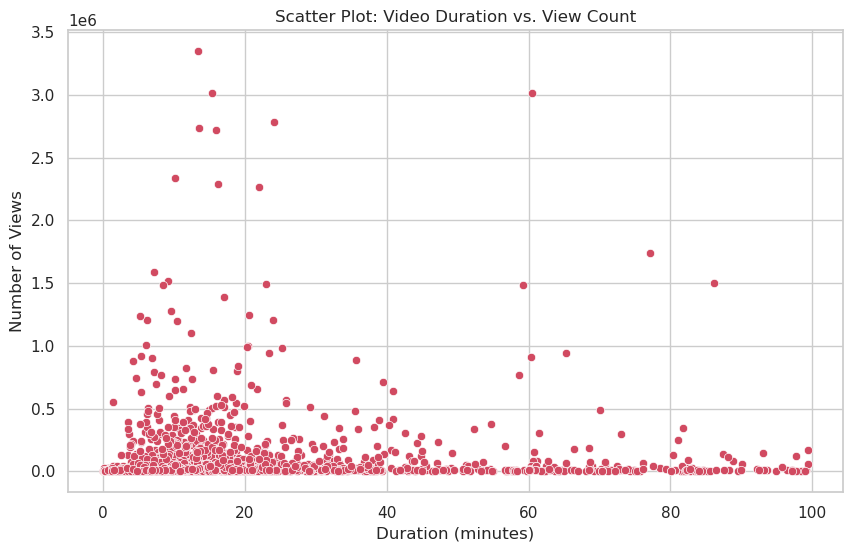

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dur_df_without_duplicates, x="durationMinutes", y="viewCount", color = peach)
plt.title('Scatter Plot: Video Duration vs. View Count')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Views')
plt.show()

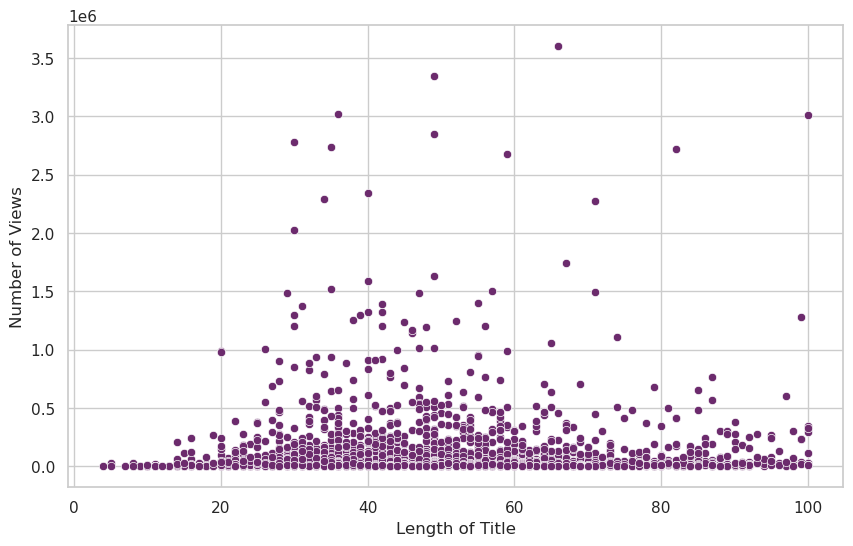

In [109]:
# Set figure size and create scatter plot
plt.rcParams['figure.figsize'] = (10, 6)

sns.scatterplot(data=video_df, x="titleLength", y="viewCount", color = violet)

plt.xlabel('Length of Title')  # Set x-axis label
plt.ylabel('Number of Views')   # Set y-axis label

plt.show()  # Display the plot

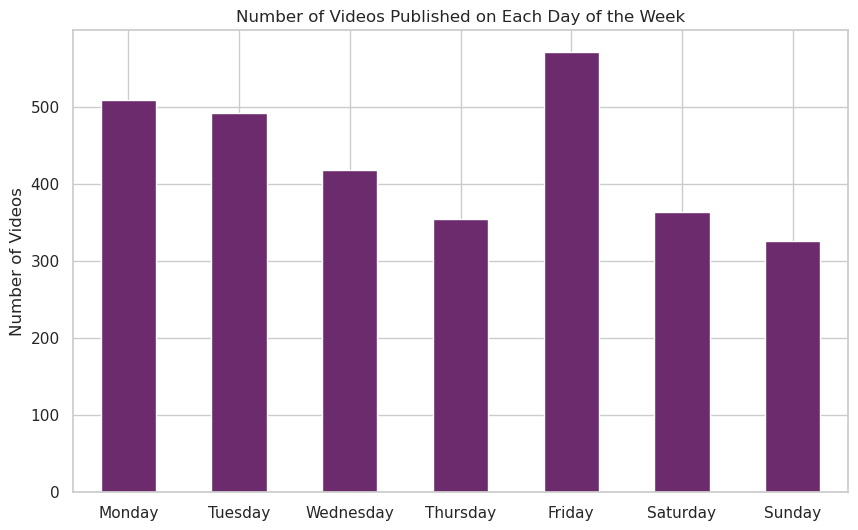

In [234]:
day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)

plt.rcParams['figure.figsize'] = (10, 6)

ax = day_df.plot.bar(rot=0, legend=False, color = violet)

plt.xlabel(None)
plt.ylabel('Number of Videos')
plt.title('Number of Videos Published on Each Day of the Week')
plt.show()

In [256]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

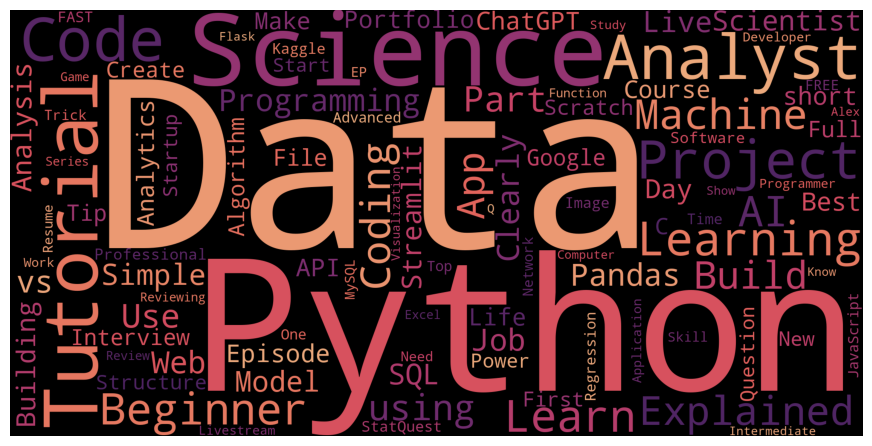

In [258]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(11, 7))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', max_words=100,
                      colormap='flare', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [252]:
stop_words = set(stopwords.words('english'))
comments_df['comments_no_stopwords'] = comments_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments_df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

In [253]:
stats_df = video_df[['channelTitle', 'viewCount', 'likeCount', 'commentCount']].groupby(['channelTitle']).mean().round()

stats_df_sorted = stats_df.reset_index().sort_values(by='viewCount', ascending=False)

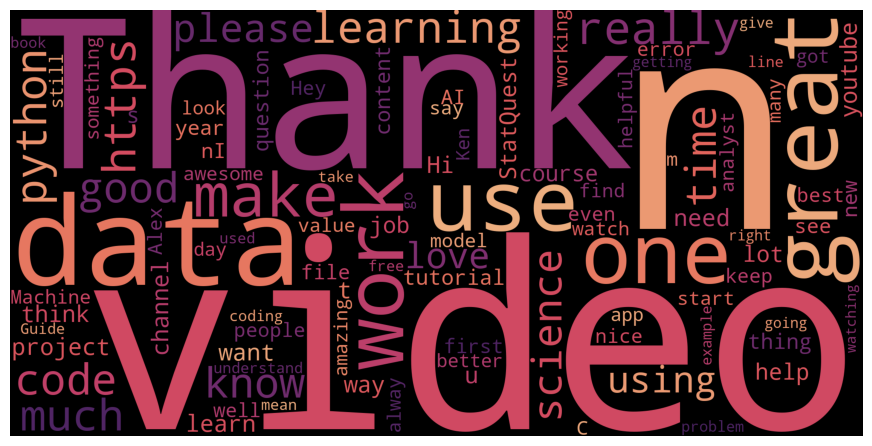

In [250]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', max_words=100, 
                      colormap='flare', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

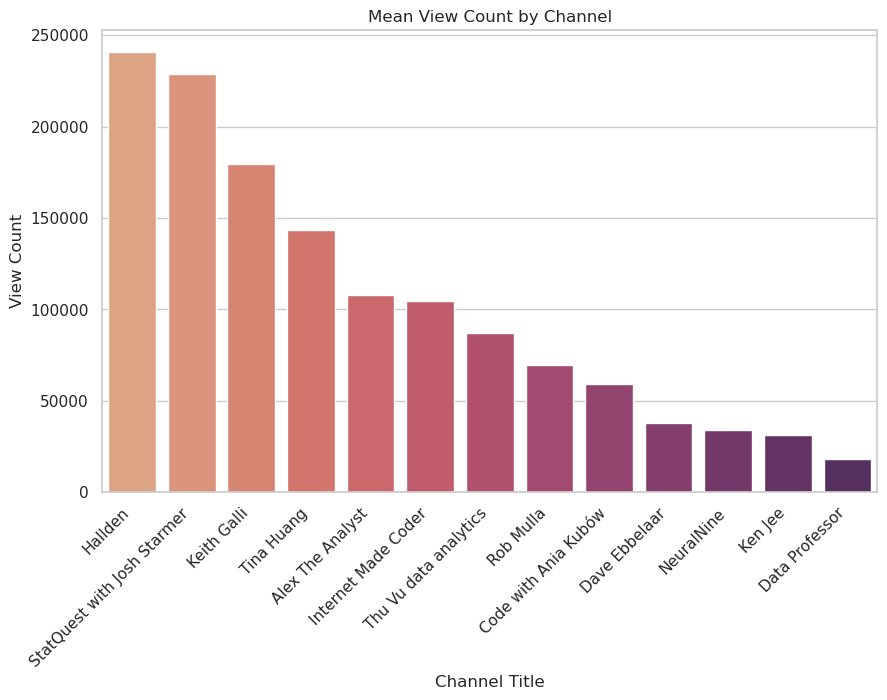

In [240]:
# Create the bar plot
ax = sns.barplot(data=stats_df_sorted, x='channelTitle', y='viewCount', palette='flare')

# Set the labels and title
ax.set_xlabel('Channel Title')
ax.set_ylabel('View Count')
ax.set_title('Mean View Count by Channel')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.show()